<a href="https://colab.research.google.com/github/carmeloarci/carmeloarci/blob/main/AFOSC_PLOT_POLARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251025/HOTBIRD_13F_PL/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251026/HD39587/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD283809/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251028/POL_STARS/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251028/POL_STARS2/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251028/HD42182_1st/polarimetry_summary.csv
✅ Trovato: /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251028/HD42182_2nd/polarimetry_summary.csv
🔄 Oggetti 'hotbird'  'HD 21291' e 'HD 14357' unificati correttamente.

✅ File combinato salvato in:
/content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/polarimetry_result_summary.csv


=== Ogge

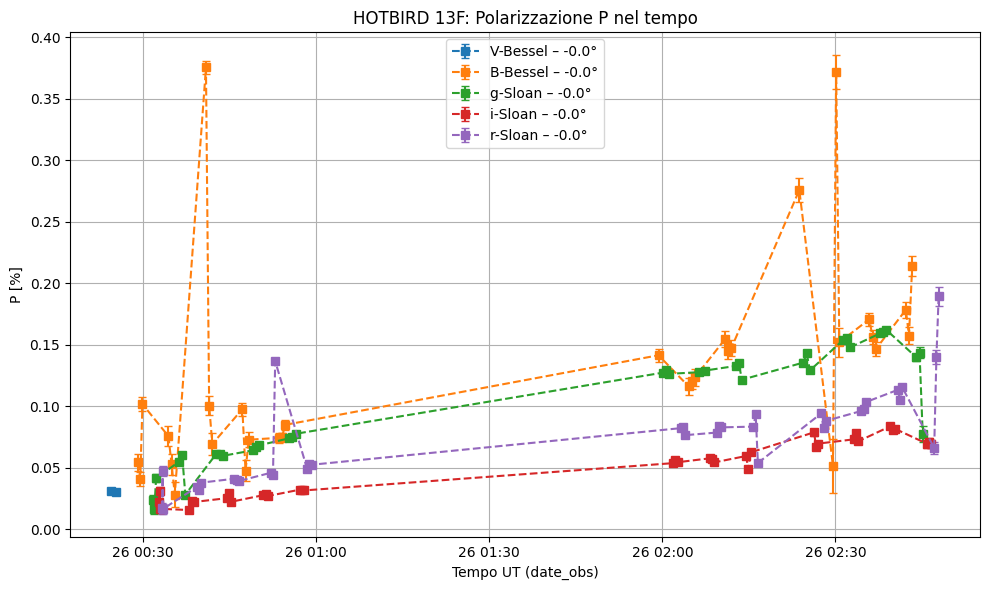

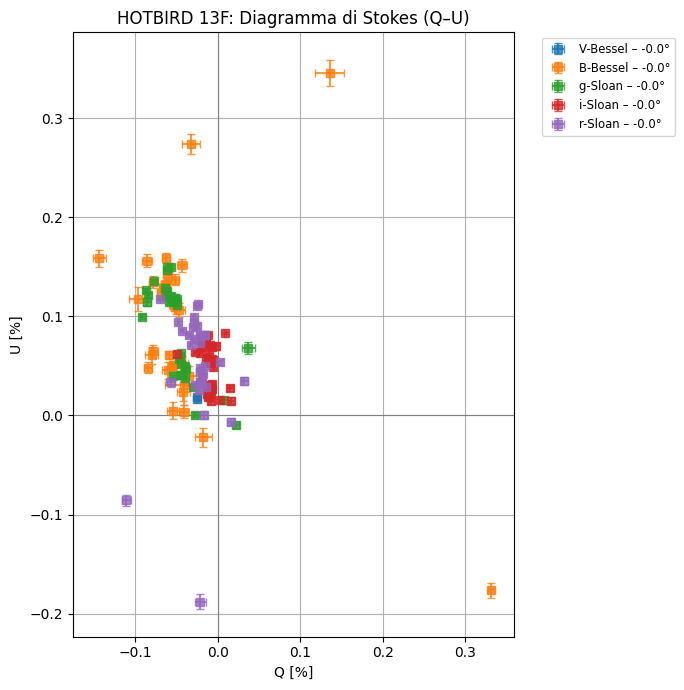

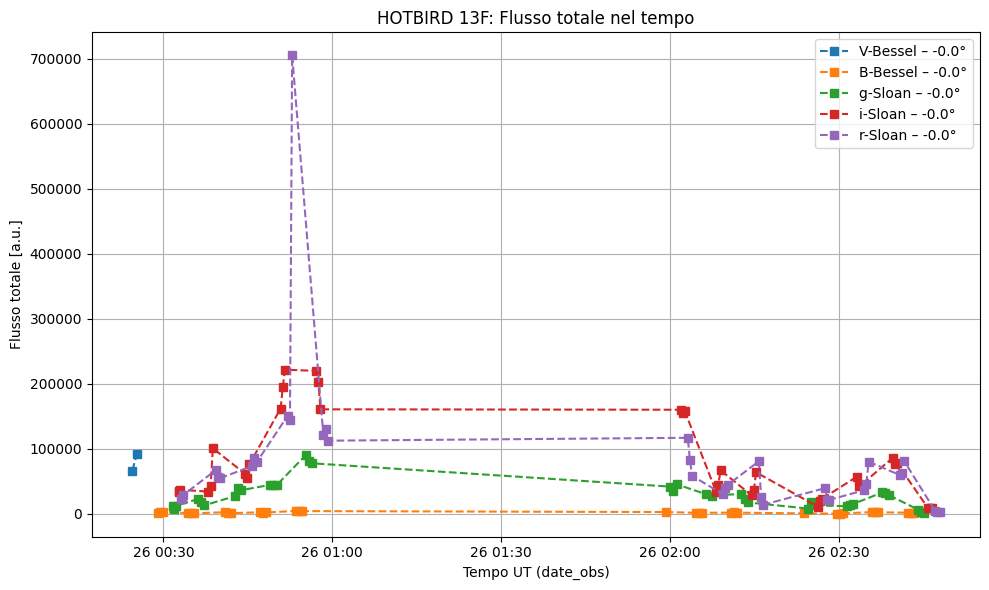

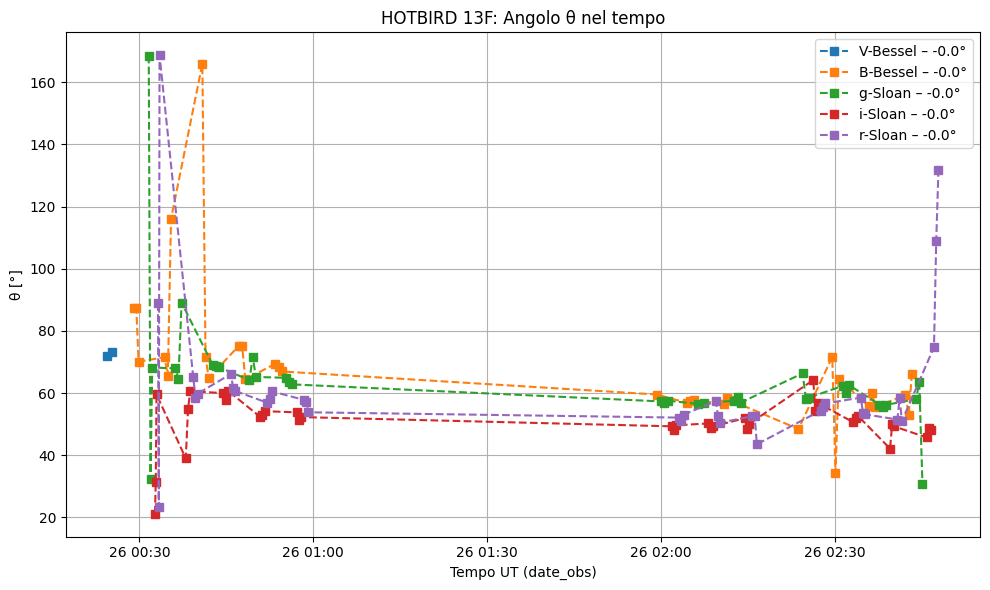


=== Oggetto: HD39587 ===


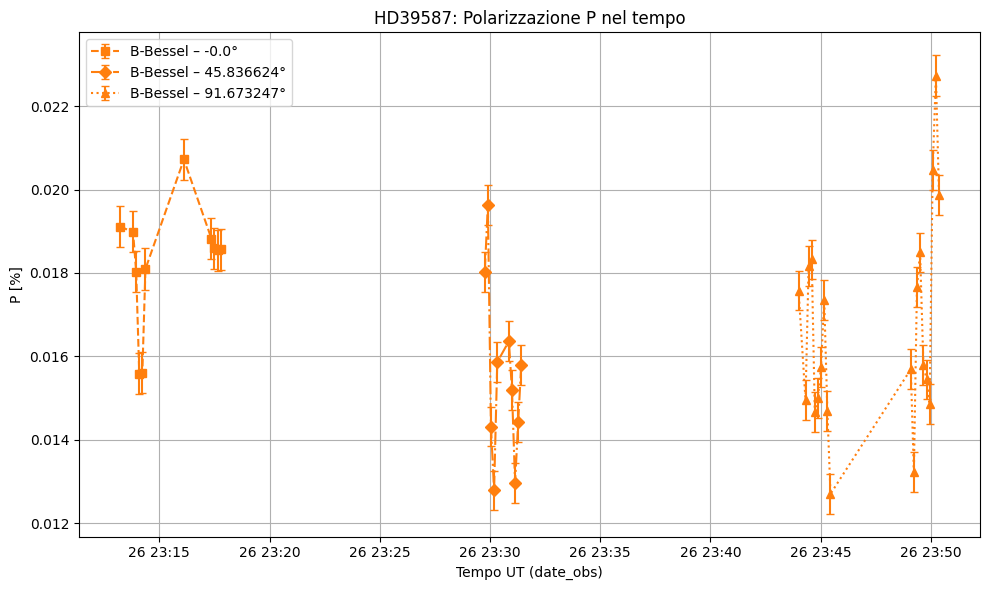

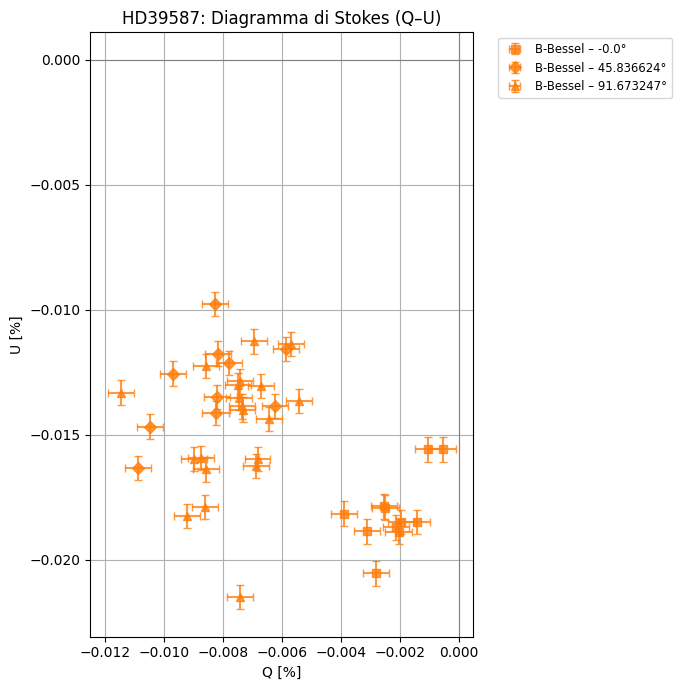

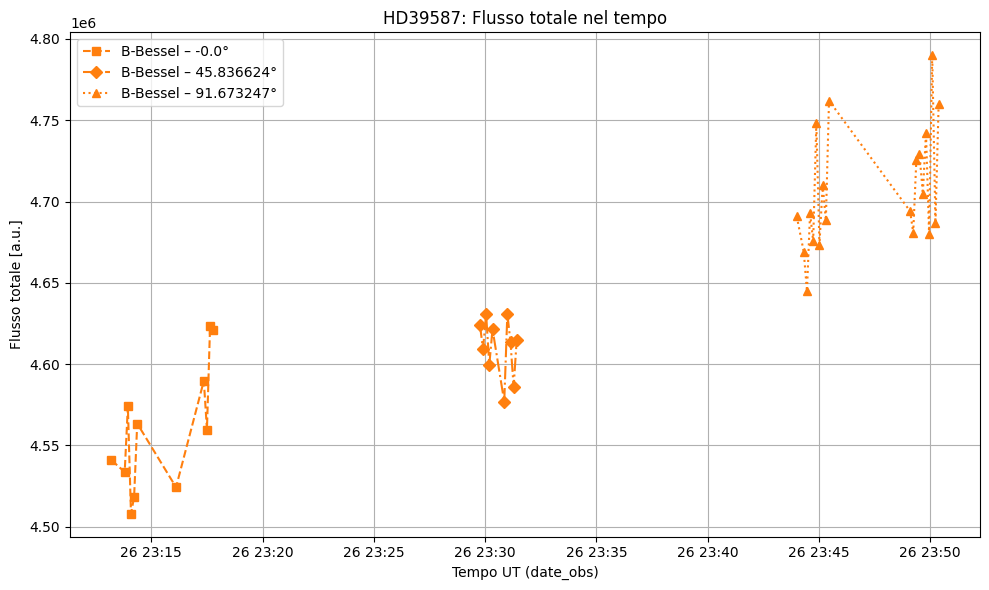

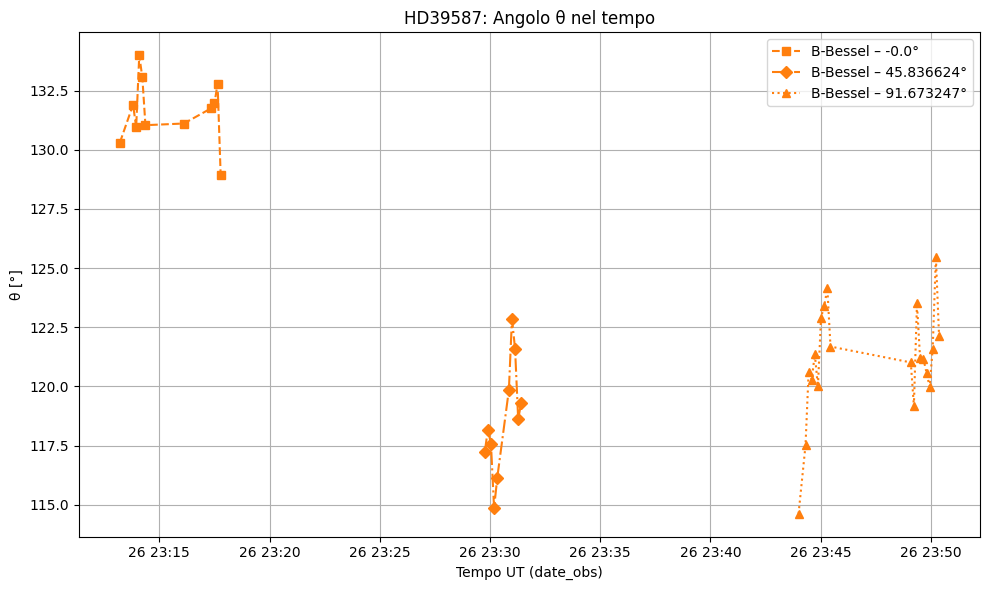


=== Oggetto: HD 283809 ===


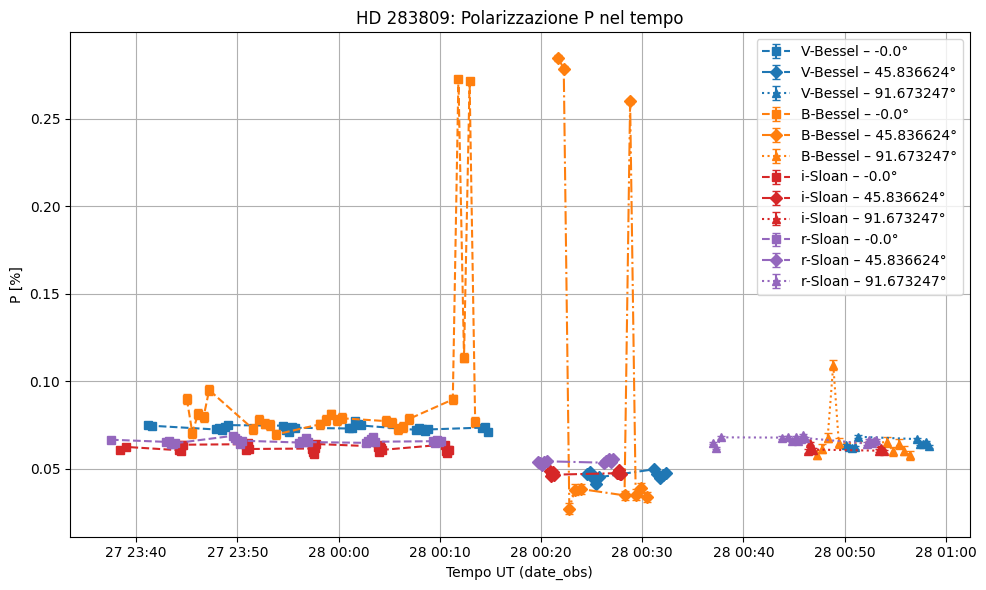

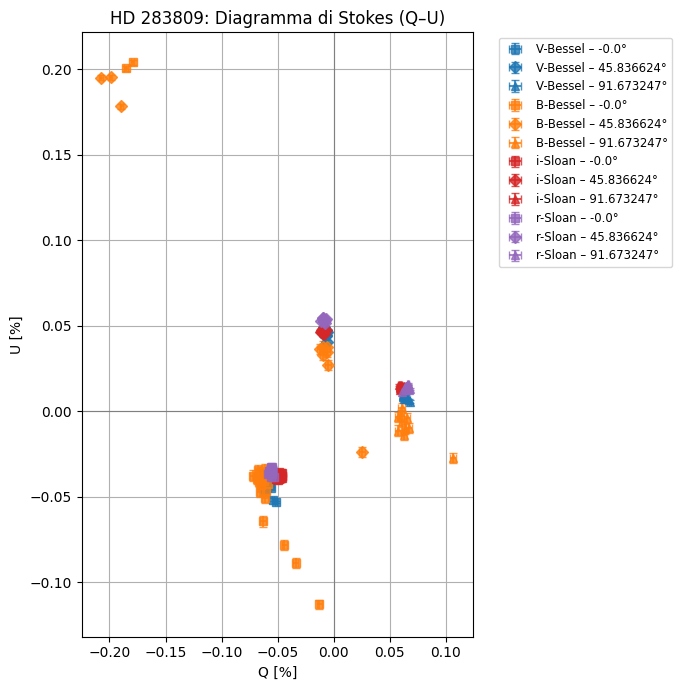

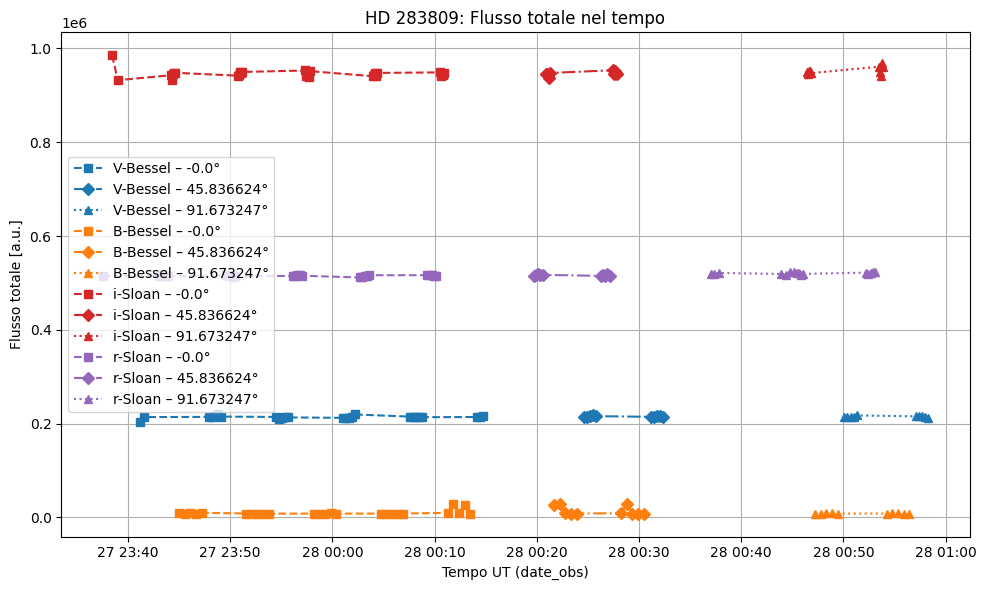

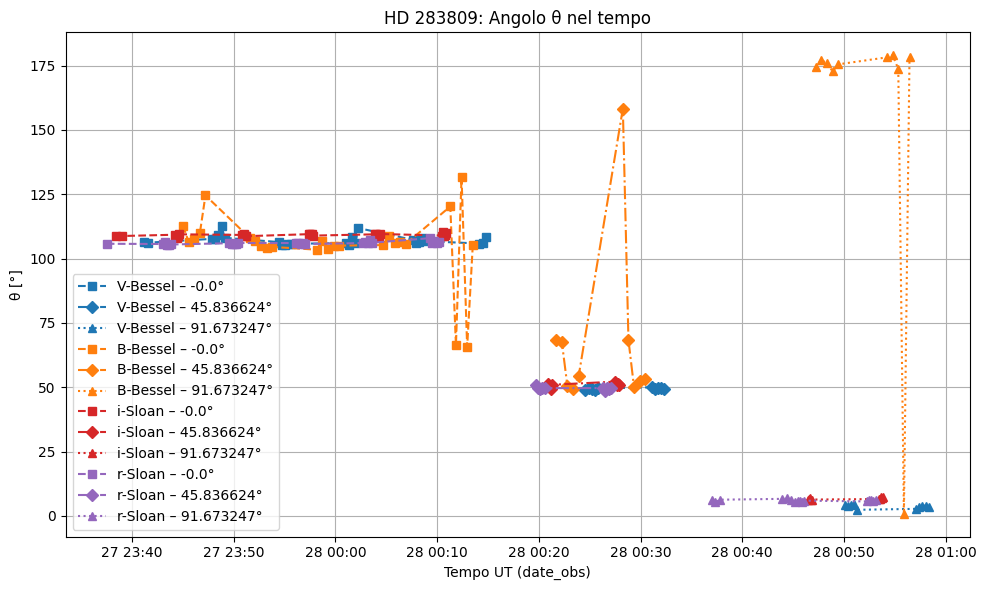


=== Oggetto: HD 21291 ===


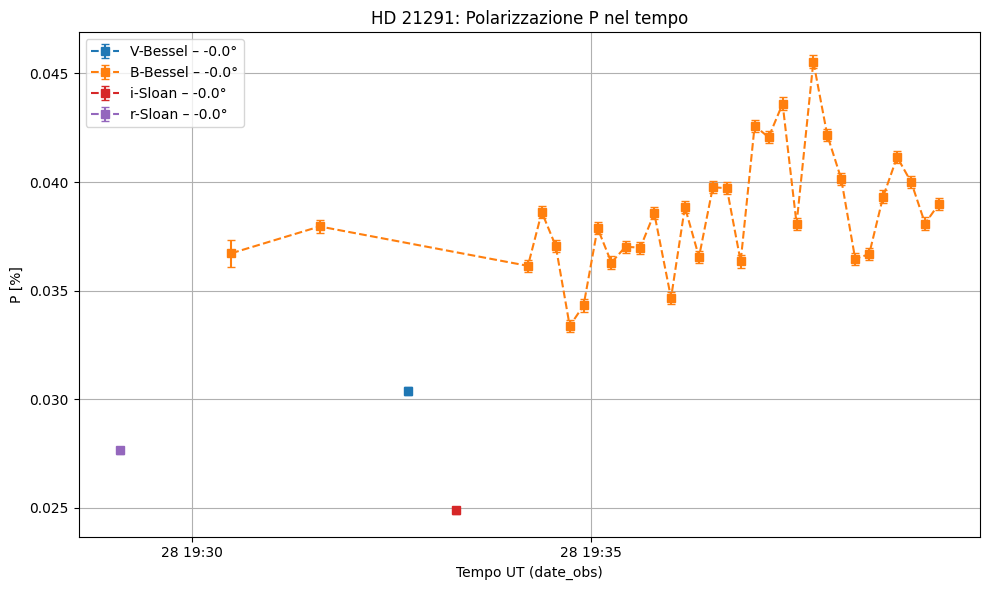

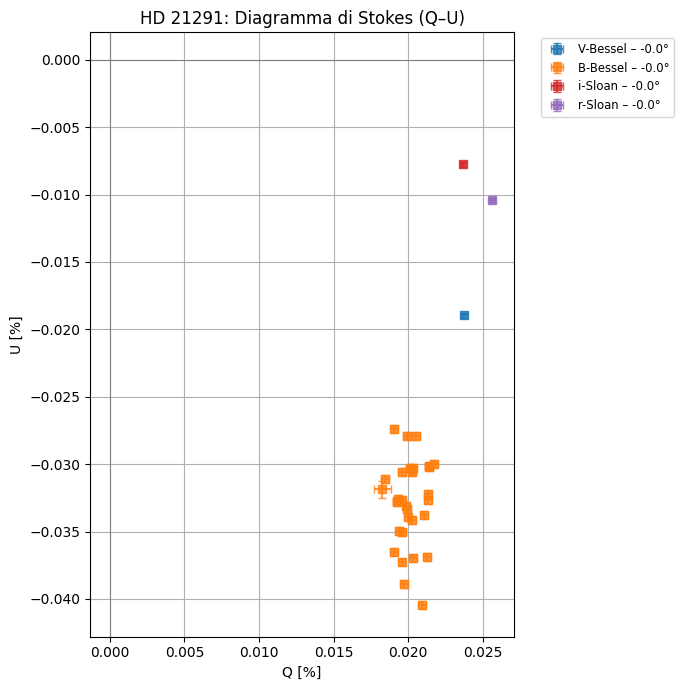

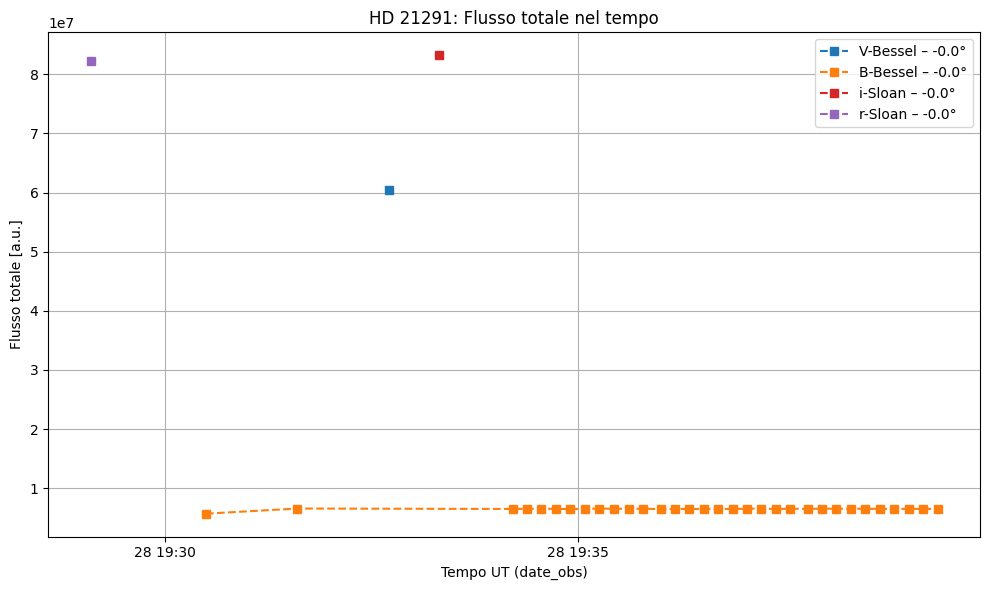

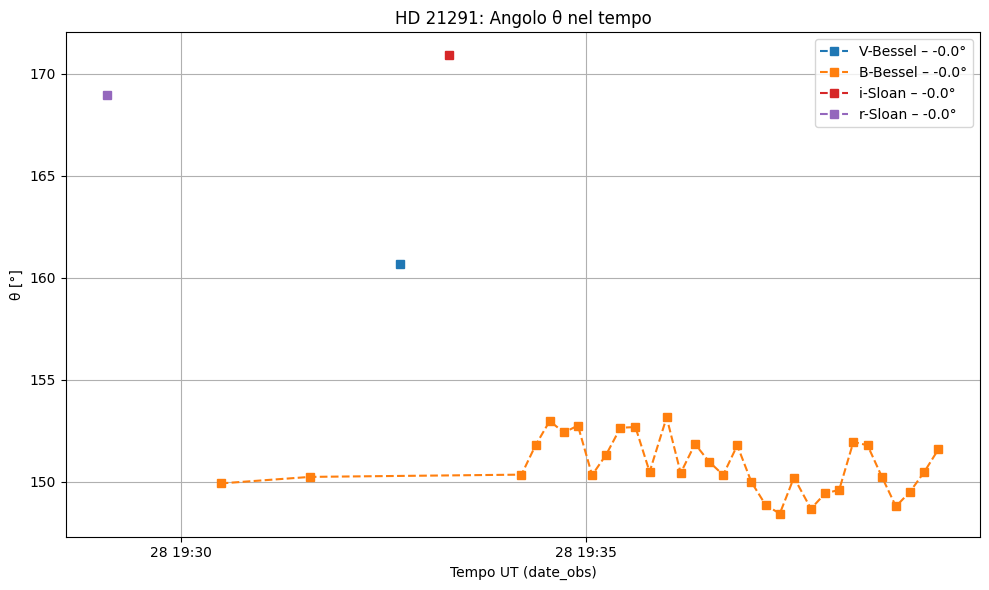


=== Oggetto: HD 14357 ===


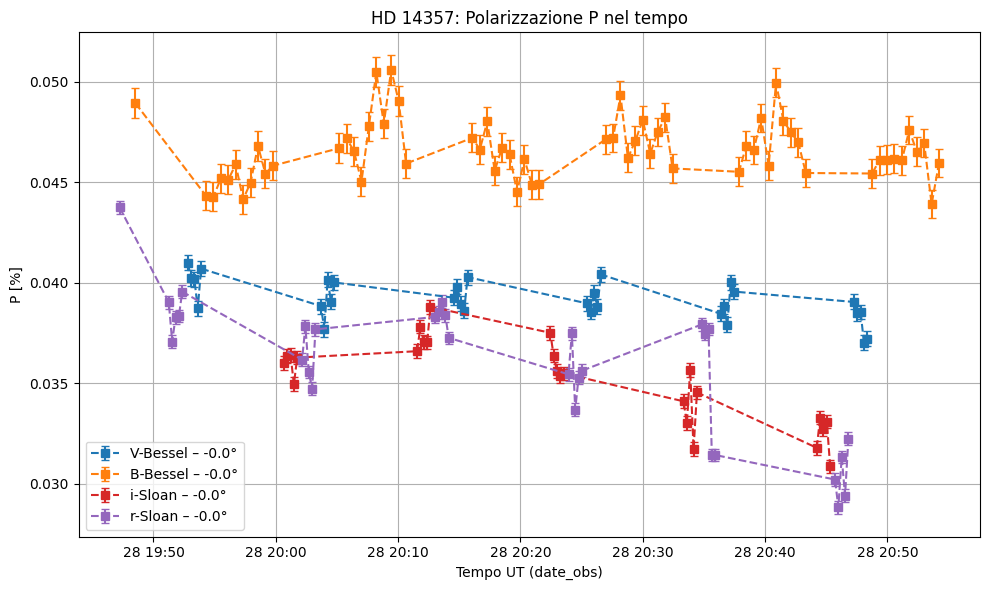

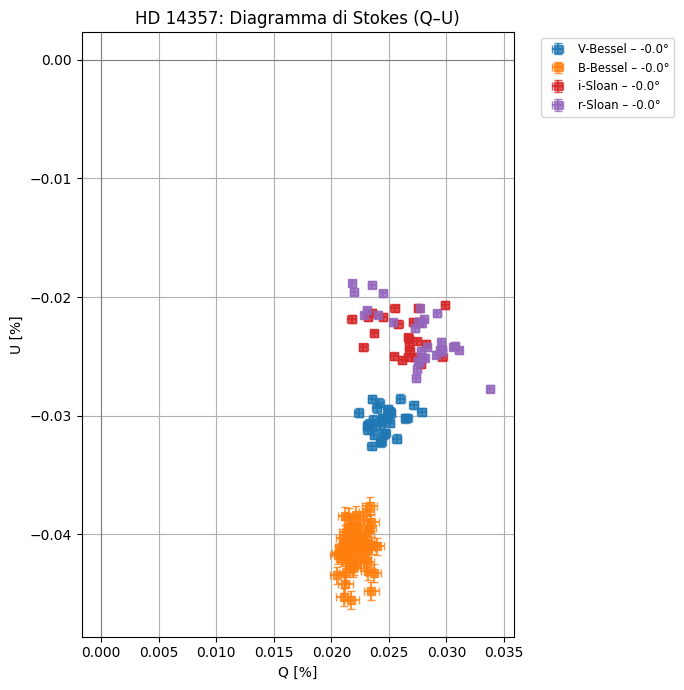

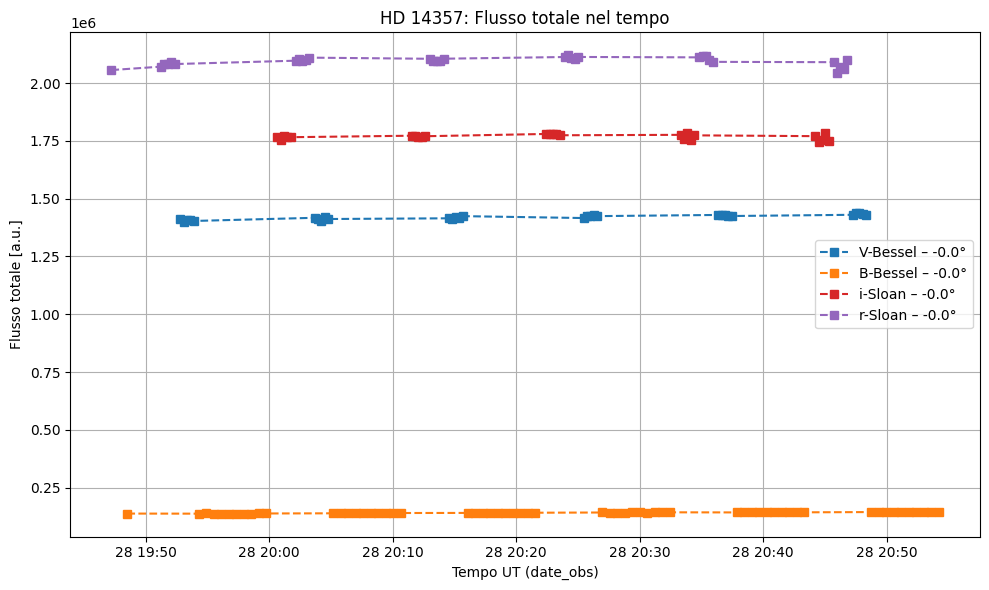

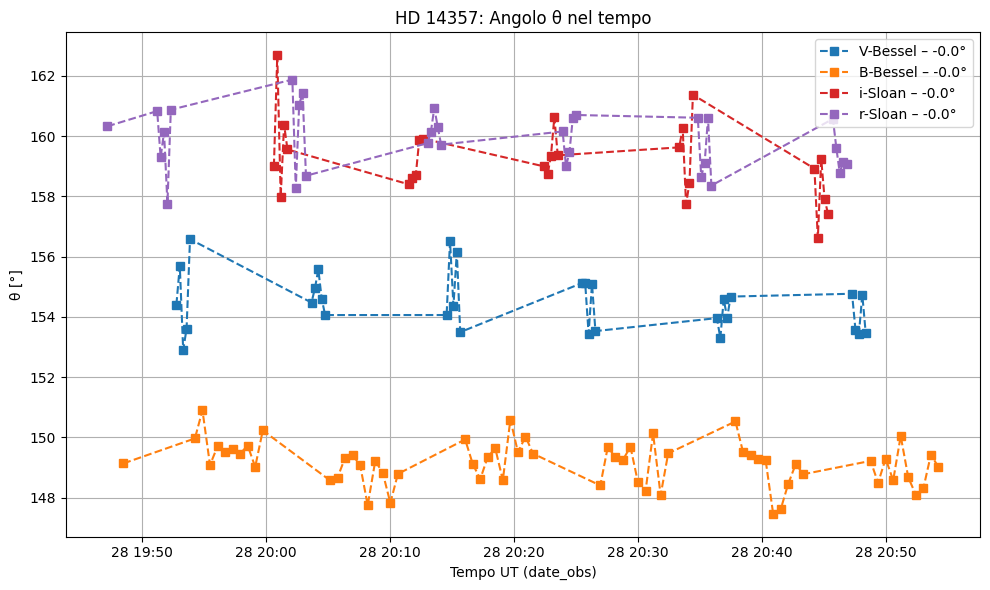


=== Oggetto: HD42182 ===


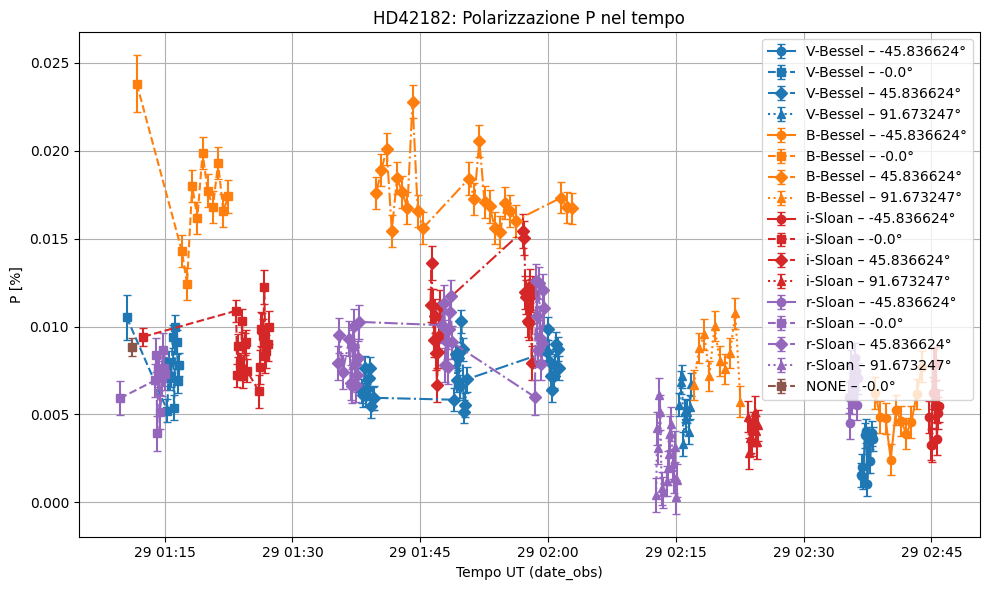

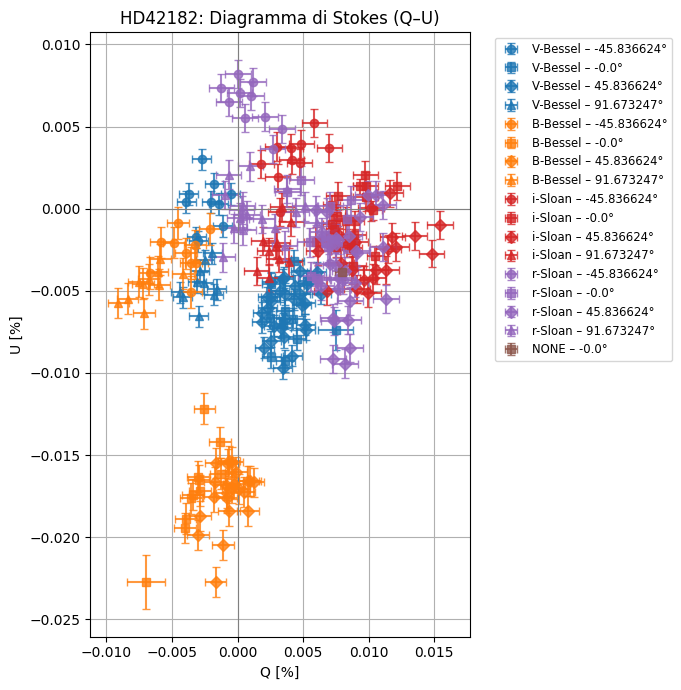

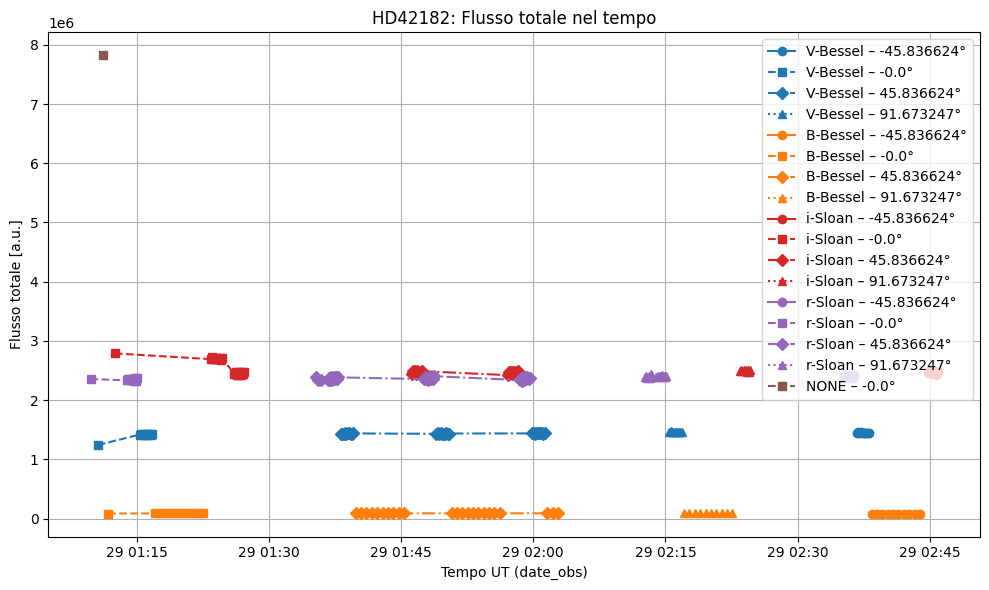

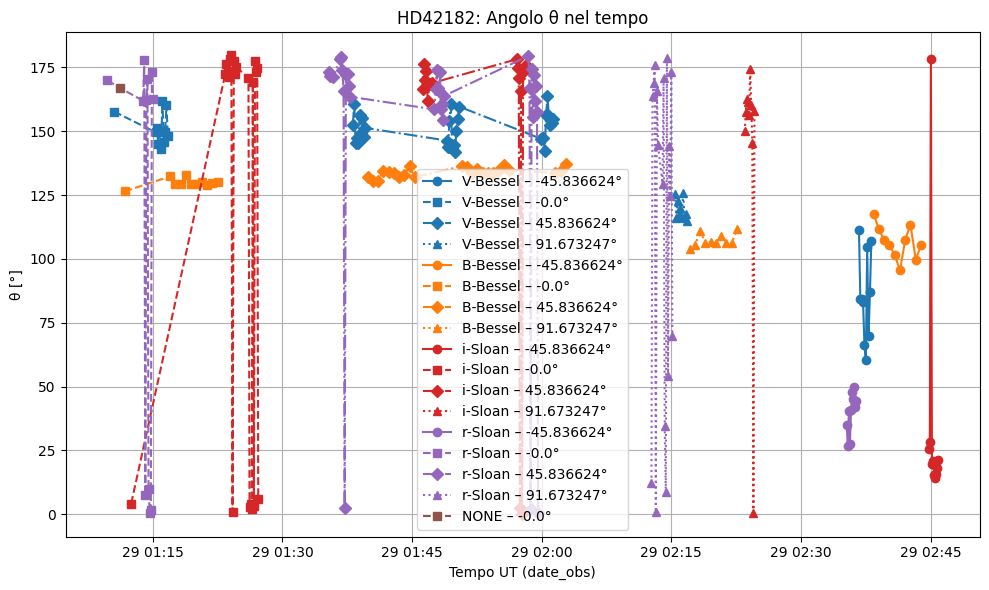


✅ Analisi completata per tutti gli oggetti.


In [ ]:
# ===============================================================
# Analisi polarimetrica AFOSC - unione e analisi risultati 26–28 Ottobre
# ===============================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

def normalize_theta(theta):
    # riduci modulo 180°
    theta_mod = theta % 180.0
    # se risultasse negativo, riportalo nel range positivo (0-180)
    if theta_mod < 0:
        theta_mod += 180.0
    return theta_mod

# Monta Google Drive (se serve)
drive.mount('/content/drive', force_remount=True)

# Base directory con spazio corretto in "Shared drives"
base_dir = "/content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/"

# Sottocartelle effettive
subdirs = [
    "20251025/HOTBIRD_13F_PL",
    "20251026/HD39587",
    "20251027/HD283809",
    "20251028/POL_STARS",
    "20251028/POL_STARS2",
    "20251028/HD42182_1st",
    "20251028/HD42182_2nd",
]
out_dir = "/content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/images/"
os.makedirs(out_dir, exist_ok=True)
# ===============================================================
# 1️⃣ Cerca e combina tutti i polarimetry_result.csv
# ===============================================================
all_files = []
for sub in subdirs:
    full_path = os.path.join(base_dir, sub)
    for root, dirs, files in os.walk(full_path):
        for f in files:
            if f.lower() in ["polarimetry_result.csv", "polarimetry_summary.csv"]:
                file_path = os.path.join(root, f)
                all_files.append(file_path)
                print(f"✅ Trovato: {file_path}")

if not all_files:
    raise FileNotFoundError("❌ Nessun file 'polarimetry_result.csv' o 'polarimetry_summary.csv' trovato.")

# Unisci tutti i file in un unico DataFrame
df_list = [pd.read_csv(f) for f in all_files]
df = pd.concat(df_list, ignore_index=True)

# Normalizza i nomi delle colonne
df.columns = [c.lower() for c in df.columns]

# Conversione e ordinamento temporale
if 'date_obs' in df.columns:
    df['date_obs'] = pd.to_datetime(df['date_obs'], errors='coerce')
    df = df.sort_values('date_obs')

# ===============================================================
# 2️⃣ Normalizza i nomi degli oggetti
# ===============================================================
if 'object' in df.columns:
    df['object'] = df['object'].astype(str).str.strip()

    # Mappatura per unire varianti di HOTBIRD 13F, HD 21291 e HD 14357
    mapping = {
        # HOTBIRD 13F
        'hotbird 13f pl r': 'HOTBIRD 13F',
        'hotbird 13f pl g': 'HOTBIRD 13F',
        'hotbird 13f pl v': 'HOTBIRD 13F',
        'hotbird 13f pl i': 'HOTBIRD 13F',
        'hotbird 13f pl b': 'HOTBIRD 13F',

        # HD 21291
        'hd 21291 r': 'HD 21291',
        'hd 21291 b': 'HD 21291',
        'hd 21291 v': 'HD 21291',
        'hd 21291 i': 'HD 21291',
        'hd21291 r': 'HD 21291',
        'hd21291 b': 'HD 21291',
        'hd21291 v': 'HD 21291',
        'hd21291 i': 'HD 21291',

        # HD 14357
        'hd 14357 r': 'HD 14357',
        'hd 14357 b': 'HD 14357',
        'hd 14357 v': 'HD 14357',
        'hd 14357 i': 'HD 14357',
        'hd14357 r': 'HD 14357',
        'hd14357 b': 'HD 14357',
        'hd14357 v': 'HD 14357',
        'hd14357 i': 'HD 14357'
    }

    # Applica mappatura case-insensitive
    df['object'] = df['object'].str.lower().replace(mapping)
    # Ripristina formato maiuscolo coerente
    df['object'] = df['object'].str.upper().str.replace('HD ', 'HD ')

    print("🔄 Oggetti 'hotbird'  'HD 21291' e 'HD 14357' unificati correttamente.")

# modulo 180 per l'angolo
df['theta_mod'] = df['theta'].apply(normalize_theta)

# Salva il file combinato aggiornato
summary_path = os.path.join(base_dir, "polarimetry_result_summary.csv")
df.to_csv(summary_path, index=False)
print(f"\n✅ File combinato salvato in:\n{summary_path}\n")

# ===============================================================
# 3️⃣ Analisi e grafici per ogni oggetto
# ===============================================================
filters = df['filter'].unique() if 'filter' in df.columns else ['all']
angles = sorted(df['rotangle_deg'].unique()) if 'rotangle_deg' in df.columns else ['0']
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'x', '+']

objects = df['object'].unique() if 'object' in df.columns else ['Unknown']

for obj in objects:
    sub_df_obj = df[df['object'] == obj]
    print(f"\n=== Oggetto: {obj} ===")

    # --- Plot 1: Polarizzazione P vs Tempo (con barre d’errore)
    if 'p' in sub_df_obj.columns:
        plt.figure(figsize=(10,6))
        for i, f in enumerate(filters):
            sub_df_f = sub_df_obj[sub_df_obj['filter'] == f]
            color = plt.cm.tab10(i % 10)
            for j, ang in enumerate(angles):
                sub_df = sub_df_f[sub_df_f['rotangle_deg'] == ang]
                if sub_df.empty:
                    continue  # ⬅️ evita label vuoti
                label = f"{f} – {ang}°"
                yerr = sub_df['p_err'] if 'p_err' in sub_df.columns else None
                plt.errorbar(sub_df['date_obs'], sub_df['p'], yerr=yerr,
                             linestyle=linestyles[j % len(linestyles)],
                             color=color, marker=markers[j % len(markers)],
                             capsize=3, label=label)
        plt.title(f'{obj}: Polarizzazione P nel tempo')
        plt.xlabel('Tempo UT (date_obs)')
        plt.ylabel('P [%]')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        fname = f"{obj}_{sub_df_obj['date_obs'].dt.strftime('%Y%m%d').iloc[0]}_polarization_degree.png"
        plt.savefig(os.path.join(out_dir, fname), dpi=300, bbox_inches='tight')
        plt.show()

    # --- Plot 2: Diagramma di Stokes Q–U (con barre d’errore)
    if {'q','u'}.issubset(sub_df_obj.columns):
        plt.figure(figsize=(7,7))
        for i, f in enumerate(filters):
            color = plt.cm.tab10(i % 10)
            sub_df_f = sub_df_obj[sub_df_obj['filter'] == f]
            for j, ang in enumerate(angles):
                sub_df = sub_df_f[sub_df_f['rotangle_deg'] == ang]
                if sub_df.empty:
                    continue  # ⬅️ evita label vuoti
                label = f"{f} – {ang}°"
                xerr = sub_df['q_err'] if 'q_err' in sub_df.columns else None
                yerr = sub_df['u_err'] if 'u_err' in sub_df.columns else None
                plt.errorbar(sub_df['q'], sub_df['u'],
                             xerr=xerr, yerr=yerr,
                             color=color, marker=markers[j % len(markers)],
                             linestyle='None', capsize=3,
                             label=label, alpha=0.8)
        plt.axhline(0, color='gray', lw=0.8)
        plt.axvline(0, color='gray', lw=0.8)
        plt.xlabel('Q [%]')
        plt.ylabel('U [%]')
        plt.title(f'{obj}: Diagramma di Stokes (Q–U)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
        plt.grid(True)
        plt.tight_layout()
        fname = f"{obj}_{sub_df_obj['date_obs'].dt.strftime('%Y%m%d').iloc[0]}_QvsU.png"
        plt.savefig(os.path.join(out_dir, fname), dpi=300, bbox_inches='tight')
        plt.show()

    # --- Plot 3: Flusso totale I_sum vs Tempo
    if 'i_sum' in sub_df_obj.columns:
        plt.figure(figsize=(10,6))
        for i, f in enumerate(filters):
            sub_df_f = sub_df_obj[sub_df_obj['filter'] == f]
            color = plt.cm.tab10(i % 10)
            for j, ang in enumerate(angles):
                sub_df = sub_df_f[sub_df_f['rotangle_deg'] == ang]
                if sub_df.empty:
                    continue  # ⬅️ evita label vuoti
                label = f"{f} – {ang}°"
                plt.plot(sub_df['date_obs'], sub_df['i_sum'],
                         linestyle=linestyles[j % len(linestyles)],
                         color=color, marker=markers[j % len(markers)],
                         label=label)
        plt.title(f'{obj}: Flusso totale nel tempo')
        plt.xlabel('Tempo UT (date_obs)')
        plt.ylabel('Flusso totale [a.u.]')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        fname = f"{obj}_{sub_df_obj['date_obs'].dt.strftime('%Y%m%d').iloc[0]}_flux.png"
        plt.savefig(os.path.join(out_dir, fname), dpi=300, bbox_inches='tight')
        plt.show()
    # --- Grafico θ vs Tempo ---
    if 'theta_mod' in sub_df_obj.columns:
        plt.figure(figsize=(10,6))
        for i, f in enumerate(filters):
            sub_df_f = sub_df_obj[sub_df_obj['filter'] == f]
            color = plt.cm.tab10(i % 10)
            for j, ang in enumerate(angles):
                sub_df = sub_df_f[sub_df_f['rotangle_deg'] == ang]
                if sub_df.empty:
                    continue  # ⬅️ evita label vuoti
                label = f"{f} – {ang}°"
                plt.plot(sub_df['date_obs'], sub_df['theta_mod'],
                         linestyle=linestyles[j % len(linestyles)],
                         color=color, marker=markers[j % len(markers)],
                         label=label)
        plt.title(f'{obj}: Angolo θ nel tempo')
        plt.xlabel('Tempo UT (date_obs)')
        plt.ylabel('θ [°]')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        fname = f"{obj}_{sub_df_obj['date_obs'].dt.strftime('%Y%m%d').iloc[0]}_theta.png"
        plt.savefig(os.path.join(out_dir, fname), dpi=300, bbox_inches='tight')
        plt.show()

print("\n✅ Analisi completata per tutti gli oggetti.")

In [ ]:
import os
import shutil
from astropy.io import fits
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive', force_remount=True)

base_dir = "/content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/"
src_parent = os.path.join(base_dir, "20251027")

if not os.path.isdir(src_parent):
    raise FileNotFoundError(f"Folder not found: {src_parent}")

# Funzione per pulire il nome oggetto
def clean_object_name(obj_name: str) -> str:
    s = obj_name.strip().upper()
    # rimuovi eventuali indicazioni di filtro o caratteri finali
    parts = s.split()
    if len(parts) > 1 and len(parts[-1]) <= 2:  # es: "R", "B", "V", "I"
        parts = parts[:-1]
    # ricomponi
    return " ".join(parts)

# Scandisci tutti i file .fits.gz nelle sottocartelle
for root, dirs, files in os.walk(src_parent):
    # Escludi la cartella HD283809
    if "HD283809" in root.split(os.sep):
        continue
    for fname in files:
        if fname.lower().endswith((".fits.gz", ".fits")):
            full_path = os.path.join(root, fname)
            try:
                # Leggi header primaria HDU
                hdr = fits.getheader(full_path, ext=0)
                obj = hdr.get('OBJECT', None)
                if obj is None:
                    # se non c’è OBJECT, provare altri keyword comuni
                    obj = hdr.get('TARGNAME', None) or hdr.get('TARGET', None)
                if obj is None:
                    print(f"[Warning] No object keyword in {fname}, skipping.")
                    continue
                clean_obj = clean_object_name(obj)
                # Crea la cartella di destinazione
                dest_folder = os.path.join(src_parent, clean_obj)
                os.makedirs(dest_folder, exist_ok=True)
                dest_path = os.path.join(dest_folder, fname)
                print(f"Moving {fname} → {dest_folder}")
                shutil.move(full_path, dest_path)
            except Exception as e:
                print(f"[Error] reading header of {fname}: {e}")


Mounted at /content/drive
Moving AF966845.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966846.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966847.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966848.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966849.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966850.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966851.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966852.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966853.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 283809
Moving AF966854.fits → /content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/20251027/HD 2

In [ ]:
import os
from astropy.io import fits
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive', force_remount=True)

base_dir = "/content/drive/Shared drives/Emissary/OSSERVAZIONI_EKAR/"
src_folder = os.path.join(base_dir, "20251027", "HD214882")

if not os.path.isdir(src_folder):
    raise FileNotFoundError(f"Folder not found: {src_folder}")

# Estensioni da considerare
extensions = (".fits", ".fits.gz")

# Itera sui files
for fname in os.listdir(src_folder):
    if fname.lower().endswith(extensions):
        full_path = os.path.join(src_folder, fname)
        try:
            # Apri in modalità update per modificare header
            with fits.open(full_path, mode='update') as hdul:
                hdr = hdul[0].header
                old_obj = hdr.get('OBJECT', None)
                if old_obj is not None and old_obj.strip() == "HD214882":
                    hdr['OBJECT'] = "HD 214882"
                    hdul.flush()  # salva le modifiche
                    print(f"✅ Updated OBJECT for {fname}")
                else:
                    print(f"- Skipping {fname}, OBJECT = {old_obj}")
        except Exception as e:
            print(f"[Error] processing {fname}: {e}")


Mounted at /content/drive
✅ Updated OBJECT for AF966083.fits
